<a href="https://colab.research.google.com/github/dilaraogz/GMKA_DILARA_OGUZ/blob/main/Python_%C3%96dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs

import warnings
warnings.filterwarnings("ignore")

In [ ]:

url = "https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=01#page-1"
     

response  = requests.get(url)

soup = bs(response.text, "html.parser")
table = soup.find("table", {"id": "summaryBasicData"})
tablo = pd.read_html(str(table))
tablo = pd.DataFrame(tablo[0])
tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7700,"45.592,1","2.329,2",329,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10570,"25.741,6","1.315,1",358,2435
2,AKBNK,Akbank,Bankacılık,1849,"96.148,0","4.912,0",518,"5.200,0"
3,AKFGY,Akfen GYO,GYO,315,"4.095,0",2092,445,"1.300,0"
4,AKSA,Aksa,Endüstriyel Tekstil,6100,"19.748,8","1.008,9",353,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1074,"17.184,0",8779,193,"1.600,0"
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,4080,"13.686,6",6992,399,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1153,"97.394,5","4.975,7",320,"8.447,1"
98,YYLGD,Yayla Agro Gıda,Gıda,2298,"10.860,3",5548,150,4726


In [ ]:
tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Kod                      100 non-null    object
 1   Hisse Adı                100 non-null    object
 2   Sektör                   100 non-null    object
 3   Kapanış (TL)             100 non-null    object
 4   Piyasa Değeri (mn TL)    100 non-null    object
 5   Piyasa Değeri (mn $)     100 non-null    object
 6   Halka Açıklık Oranı (%)  100 non-null    int64 
 7   Sermaye (mn TL)          100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [ ]:
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].str.replace(".","")
tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].str.replace(".","")
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].str.replace(".","")
tablo["Halka Açıklık Oranı (%)"] = tablo["Halka Açıklık Oranı (%)"]/10
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].str.replace(".","")


tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7700,"45592,1","2329,2",32.9,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10570,"25741,6","1315,1",35.8,2435
2,AKBNK,Akbank,Bankacılık,1849,"96148,0","4912,0",51.8,"5200,0"
3,AKFGY,Akfen GYO,GYO,315,"4095,0",2092,44.5,"1300,0"
4,AKSA,Aksa,Endüstriyel Tekstil,6100,"19748,8","1008,9",35.3,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1074,"17184,0",8779,19.3,"1600,0"
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,4080,"13686,6",6992,39.9,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1153,"97394,5","4975,7",32.0,"8447,1"
98,YYLGD,Yayla Agro Gıda,Gıda,2298,"10860,3",5548,15.0,4726


In [ ]:
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].str.replace(",",".")
tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].str.replace(",",".")
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].str.replace(",",".")
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].str.replace(",",".")

tablo


,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7700,45592.1,2329.2,32.9,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10570,25741.6,1315.1,35.8,2435
2,AKBNK,Akbank,Bankacılık,1849,96148.0,4912.0,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,315,4095.0,2092,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,6100,19748.8,1008.9,35.3,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1074,17184.0,8779,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,4080,13686.6,6992,39.9,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1153,97394.5,4975.7,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,2298,10860.3,5548,15.0,4726


In [ ]:
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].astype(float)
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"]/100

tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].astype(float)
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].astype(float)
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].astype(float)

tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,77.00,45592.1,2329.2,32.9,5921.0
1,AGHOL,Anadolu Grubu Holding,Holdingler,105.70,25741.6,1315.1,35.8,2435.0
2,AKBNK,Akbank,Bankacılık,18.49,96148.0,4912.0,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,3.15,4095.0,2092.0,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,61.00,19748.8,1008.9,35.3,3238.0
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,10.74,17184.0,8779.0,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,40.80,13686.6,6992.0,39.9,3355.0
97,YKBNK,Yapı Kredi Bankası,Bankacılık,11.53,97394.5,4975.7,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,22.98,10860.3,5548.0,15.0,4726.0


In [ ]:
tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kod                      100 non-null    object 
 1   Hisse Adı                100 non-null    object 
 2   Sektör                   100 non-null    object 
 3   Kapanış (TL)             100 non-null    float64
 4   Piyasa Değeri (mn TL)    100 non-null    float64
 5   Piyasa Değeri (mn $)     100 non-null    float64
 6   Halka Açıklık Oranı (%)  100 non-null    float64
 7   Sermaye (mn TL)          100 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


In [ ]:
temiz_tablo = tablo.copy()
temiz_tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,77.00,45592.1,2329.2,32.9,5921.0
1,AGHOL,Anadolu Grubu Holding,Holdingler,105.70,25741.6,1315.1,35.8,2435.0
2,AKBNK,Akbank,Bankacılık,18.49,96148.0,4912.0,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,3.15,4095.0,2092.0,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,61.00,19748.8,1008.9,35.3,3238.0
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,10.74,17184.0,8779.0,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,40.80,13686.6,6992.0,39.9,3355.0
97,YKBNK,Yapı Kredi Bankası,Bankacılık,11.53,97394.5,4975.7,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,22.98,10860.3,5548.0,15.0,4726.0


In [ ]:
temiz_tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kod                      100 non-null    object 
 1   Hisse Adı                100 non-null    object 
 2   Sektör                   100 non-null    object 
 3   Kapanış (TL)             100 non-null    float64
 4   Piyasa Değeri (mn TL)    100 non-null    float64
 5   Piyasa Değeri (mn $)     100 non-null    float64
 6   Halka Açıklık Oranı (%)  100 non-null    float64
 7   Sermaye (mn TL)          100 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


# Bist 100 Yapısının İncelenmesi

In [ ]:
top10 = temiz_tablo.sort_values('Piyasa Değeri (mn TL)', ascending=False).head(10)
top10

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
52,KCHOL,Koç Holding,Holdingler,96.60,244967.8,12514.9,26.4,2535.9
72,SASA,Sasa Polyester Sanayi A.Ş.,Endüstriyel Tekstil,96.50,222200.1,11351.7,23.0,2302.6
35,FROTO,Ford Otosan,Otomotiv,575.40,201913.6,10315.3,17.8,3509.0
81,THYAO,Türk Hava Yolları,Havayolları ve Hizm.,136.30,188094.0,9609.3,50.3,1380.0
30,ENKAI,Enka İnşaat,İnşaat- Taahhüt,25.54,153240.0,7828.7,8.9,6000.0
46,ISCTR,İş Bankası (C),Bankacılık,14.10,140999.6,7203.4,33.5,10000.0
90,TUPRS,Tüpraş,Petrol,71.50,137765.9,7038.2,46.5,1926.8
36,GARAN,Garanti Bankası,Bankacılık,31.20,131040.0,6694.6,14.0,4200.0
74,SISE,Şişecam,Cam,40.40,123753.8,6322.3,48.9,3063.2
32,EREGL,Ereğli Demir Çelik,Demir-Çelik Temel,31.10,108850.0,5560.9,47.5,3500.0


In [ ]:
"""plt.figure(figsize=(16,8))
plt.bar(top10['Hisse Adı'], top10['Piyasa Değeri (mn TL)'] / 1e3)
plt.title('Piyasa Değeri En Yüksek İlk 10 Şirket')
plt.grid()
plt.ylabel('Piyasa Değeri (Bin TL)')
plt.xlabel('Hisse Adı')
plt.show()"""

fig_1 = px.bar(top10, x=top10['Hisse Adı'], y=top10['Piyasa Değeri (mn TL)'],
        width=1000, height=500,
        title = "Piyasa Değeri En Yüksek İlk 10 Şirket",
        hover_data = {"Hisse Adı": "::", "Piyasa Değeri (mn TL)": ":.2f",},
        )

fig_1.show()

In [ ]:
"""sektörler = dict(temiz_tablo.groupby("Sektör").groups)
x = []

for i in sektörler.keys():
  x.append(i)
  x.append(temiz_tablo[temiz_tablo["Sektör"] == i]["Kapanış (TL)"].mean())

fig_1 = px.bar(x, x=x['Hisse Adı'], y=top10['Piyasa Değeri (mn TL)'],
        width=1000, height=500,
        title = "Piyasa Değeri En Yüksek İlk 10 Şirket",
        hover_data = {"Hisse Adı": "::", "Piyasa Değeri (mn TL)": ":.2f",},
        )

fig_1.show()"""

'sektörler = dict(temiz_tablo.groupby("Sektör").groups)\nx = []\n\nfor i in sektörler.keys():\n  x.append(i)\n  x.append(temiz_tablo[temiz_tablo["Sektör"] == i]["Kapanış (TL)"].mean())\n\nfig_1 = px.bar(x, x=x[\'Hisse Adı\'], y=top10[\'Piyasa Değeri (mn TL)\'],\n        width=1000, height=500,\n        title = "Piyasa Değeri En Yüksek İlk 10 Şirket",\n        hover_data = {"Hisse Adı": "::", "Piyasa Değeri (mn TL)": ":.2f",},\n        )\n\nfig_1.show()'

# Şireketlerin Analizi:

In [ ]:

# Verileri indirin ve her şirket için ayrı bir değişkene kaydedin
SKBNKC_data = yf.download('SKBNK.IS', start='2021-01-01', end='2021-12-31')
TSKB_data = yf.download('TSKB.IS', start='2021-01-01', end='2021-12-31')
TCELL_data = yf.download('TCELL.IS', start='2021-01-01', end='2021-12-31')
TTKOM_data = yf.download('TTKOM.IS', start='2021-01-01', end='2021-12-31')
TURSG_data = yf.download('TURSG.IS', start='2021-01-01', end='2021-12-31')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
SKBNKC_data

In [ ]:
TSKB_data

In [ ]:
TCELL_data

In [ ]:
TTKOM_data

In [ ]:
TURSG_data

In [ ]:
# Semboller listesi
symbols = ['SKBNK.IS', 'TCELL.IS', 'TSKB.IS', 'TTKOM.IS', 'TURSG.IS', "XU100.IS"]

# Verileri al
data = yf.download(symbols, start='2021-01-01', end='2021-12-31', interval='1d', group_by='ticker')


[*********************100%***********************]  6 of 6 completed


In [ ]:
# Her hisse senedi için ayrı bir veri çerçevesi oluştur
skbnk = data['SKBNK.IS']
tcell = data['TCELL.IS']
tskb = data['TSKB.IS']
ttkom = data['TTKOM.IS']
tursg = data['TURSG.IS']
bist100 = data['XU100.IS']

skbnk = skbnk[['Adj Close']]
tcell = tcell[['Adj Close']]
tskb = tskb[['Adj Close']]
ttkom = ttkom[['Adj Close']]
tursg = tursg[['Adj Close']]
bist100 = bist100[['Adj Close']]

skbnk["Normalize"] = skbnk[['Adj Close']] / skbnk.iloc[0,0]
tcell["Normalize"] = tcell[['Adj Close']]/ tcell.iloc[0,0]
tskb["Normalize"] = tskb[['Adj Close']]/tskb.iloc[0,0]
ttkom["Normalize"] = ttkom[['Adj Close']]/ttkom.iloc[0,0]
tursg["Normalize"] = tursg[['Adj Close']]/tursg.iloc[0,0]
bist100["Normalize"] = bist100[['Adj Close']]/bist100.iloc[0,0]




<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

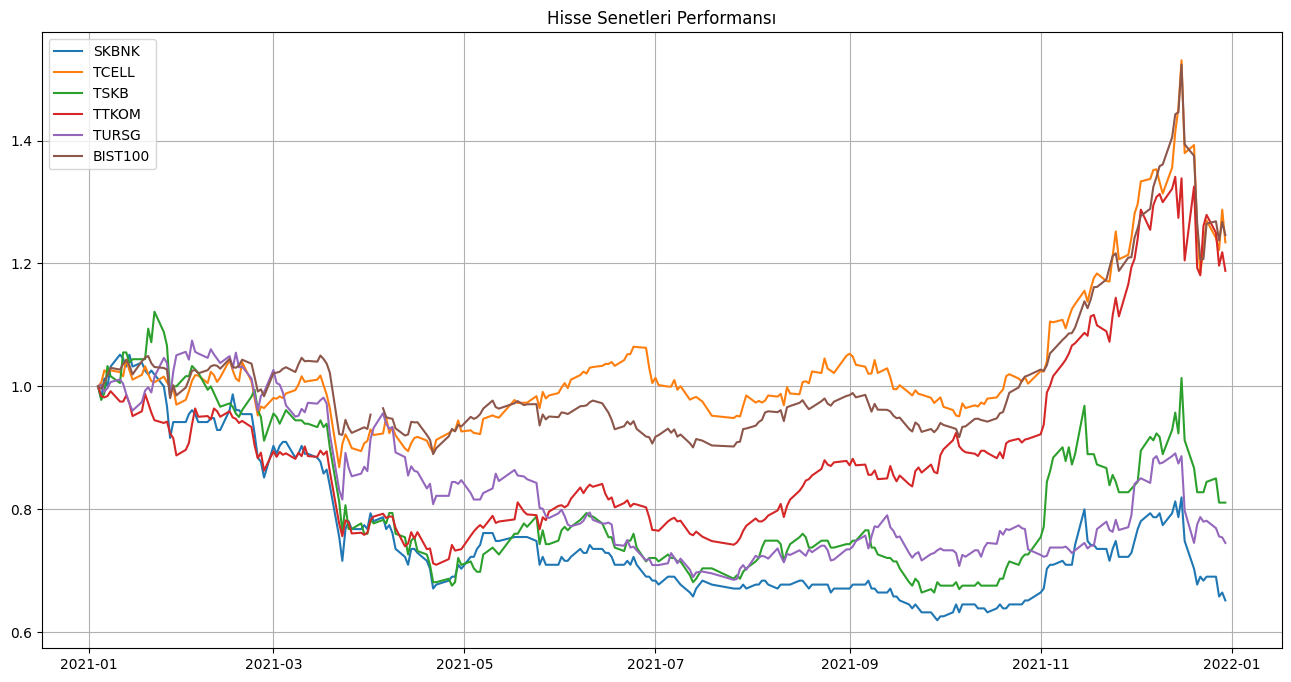

In [ ]:
# Grafiği oluştur
plt.figure(figsize=(16,8))
plt.plot(skbnk['Normalize'], label='SKBNK')
plt.plot(tcell['Normalize'], label='TCELL')
plt.plot(tskb['Normalize'], label='TSKB')
plt.plot(ttkom['Normalize'], label='TTKOM')
plt.plot(tursg['Normalize'], label='TURSG')
plt.plot(bist100['Normalize'], label='BIST100')

plt.legend()
plt.grid()
plt.title('Hisse Senetleri Performansı')
plt.xlabel

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1.52,1.60,1.52,1.55,1.514809,489603227
2021-01-05,1.54,1.56,1.51,1.52,1.485490,184249504
2021-01-06,1.53,1.59,1.52,1.57,1.534355,568239116
2021-01-07,1.59,1.61,1.55,1.55,1.514809,362921590
2021-01-08,1.57,1.64,1.55,1.60,1.563674,632876556
...,...,...,...,...,...,...
2021-12-24,1.07,1.07,1.05,1.07,1.045707,76248670
2021-12-27,1.07,1.08,1.05,1.07,1.045707,83652802
2021-12-28,1.07,1.07,1.01,1.02,0.996842,93477354
